<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](024_Image_display.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](022_Pandas.ipynb)



#  023 Plotting Graphs


### Purpose

We have seen from [020_Python_files](020_Python_files.ipynb) [021_URLs](021_URLs.ipynb) and [022_Pandas](022_Pandas.ipynb) how to access both text and binary datasets, either from the local file system or from a URL to a local file.

In this section, we will learn how to plot graphs from such data. 

We will be using the core [`matplotlib`](https://matplotlib.org) library for this. We will show only basic plotting here. You will find many examples that you can develop from the the  [`matplotlib` site](https://matplotlib.org/tutorials/introductory/sample_plots.html).

You might follow these notes up by looking at the Python packages [`bokeh`](https://bokeh.org/) and [`seaborn`](https://seaborn.pydata.org/) for improved visualisation and interaction.

### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [002 Unix](002_Unix.ipynb) with a good familiarity with the UNIX commands we have been through.
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)
* [020_Python_files](020_Python_files.ipynb)
* [021_URLs](021_URLs.ipynb)
* [022_Pandas](022_Pandas.ipynb)

You will need to know how to use [`pandas`](022_Pandas.ipynb) for reading a CSV dataset. Note that you can do plotting within `pandas`. But this is much the same as using [`matplotlib`](https://matplotlib.org) directly, so we will not be using `pandas` plotting. 


## Simple x-y plot

We have [previously](022_Pandas.ipynb#pandas-format-and-read_table) seen a dataset of Monthly Southeast England precipitation (mm) in a tabular form on the [Met Office website](https://www.metoffice.gov.uk/hadobs/hadukp/data/monthly/HadSEEP_monthly_qc.txt) and how to load this into `pandas`:

In [1]:
import pandas as pd
from urlpath import URL
from pathlib import Path

# Monthly Southeast England precipitation (mm) 
site = 'https://www.metoffice.gov.uk/'
site_dir = 'hadobs/hadukp/data/monthly'
site_file = 'HadSEEP_monthly_totals.txt'


panda_format = {
    'skiprows'   :  3,
    'na_values'  :  [-99.9],
    'sep'        :  r"[ ]{1,}",
    'engine'     :  'python'
}

url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

    
df.head()

file work/HadSEEP_monthly_totals.txt written: 15308 bytes


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1873,87.1,50.4,52.9,19.9,41.1,63.6,53.2,56.4,62.0,86.0,59.4,15.7,647.7
1,1874,46.8,44.9,15.8,48.4,24.1,49.9,28.3,43.6,79.4,96.1,63.9,52.3,593.5
2,1875,96.9,39.7,22.9,37.0,39.1,76.1,125.1,40.8,54.7,137.7,106.4,27.1,803.5
3,1876,31.8,71.9,79.5,63.6,16.5,37.2,22.3,66.3,118.2,34.1,89.0,162.9,793.3
4,1877,146.0,47.7,56.2,66.4,62.3,24.9,78.5,82.4,38.4,58.1,144.5,54.2,859.6


The `pandas` dataframe is essentially a dictionary, so we refer to the data for column `JAN` and `df['JAN']` etc. 

We can access the column headings as:

In [2]:
headings = df.columns
print(headings)

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Annual'],
      dtype='object')


so, if we wanted just the months, we would want to leave out the first and last entry, and this would be:

In [3]:
headings = df.columns[1:-1]
print(headings)

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')


Let's plot some of this dataset now:

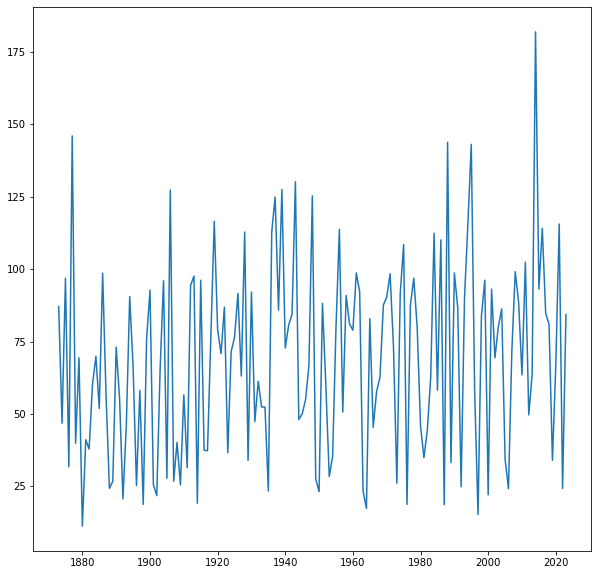

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.plot(df["Year"],df['Jan'],label='Jan')

We can easily customise this by adding titles and labels:

Text(0.5, 0, 'year')

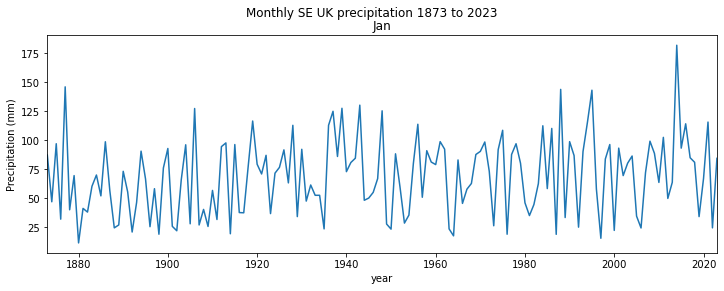

In [5]:
import matplotlib.pyplot as plt

# make a useful title
year0 = list(df["Year"])[0]
year1 = list(df["Year"])[-1]
name = f'Monthly SE UK precipitation {year0} to {year1}'

# plot size 
x_size,y_size = 12,4
# set up the figure: 
#   1 x 1 sub-plots
#   size of plot 10,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
# set the figure title
fig.suptitle(name)

# plot y-data and set the label
axs.plot(df["Year"],df['Jan'],label='Jan')
# set x-limits to get a neat graph
axs.set_xlim(year0,year1)

# set the subplot title
axs.set_title('Jan')
# y-label
axs.set_ylabel(f'Precipitation (mm)')
# x-label
axs.set_xlabel(f'year')

The code to do this sort of plot is simple and generic. This example has most of what you will need in terms of coding for line plots. 

If we wanted to do several plots over each other, we can simply call `axs.plot` again, but we will also find it useful to set a legend:

Text(0.5, 0, 'year')

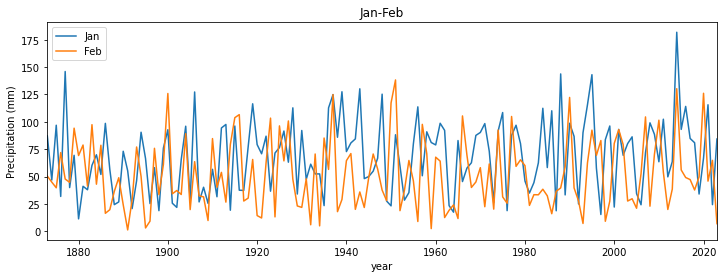

In [6]:
# make a useful title
name = f'Monthly SE UK precipitation'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))

# plot y-data and set the label
axs.plot(df["Year"],df['Jan'],label='Jan')
axs.plot(df["Year"],df['Feb'],label='Feb')
axs.set_xlim(year0,year1)

# set legend now
axs.legend(loc='best')
# set the subplot title
axs.set_title('Jan-Feb')
# y-label
axs.set_ylabel(f'Precipitation (mm)')
# x-label
axs.set_xlabel(f'year')

If, instead, we wanted these on separate sub-plots, we specify that in the `plt.subplots` call. For a line of 2 plots, we use:

    plt.subplots(2,1,...)
    
We should also increase the `y_size` variable, to make the plot longer, and notice that `axs` is a `tuple` now, where we access `axs[0]` for the first plot, `axs[1]` for the second etc. 

If we had 2 rows of plots and 2 columns, `axs` would be 2-dimensional and we would refer to `axs[0,0]`, `axs[0,1]`, `axs[1,0]` and `axs[1,1]`. It is easier deal with as a one-dimensional array though. We can achieve this by applying:

    axs = axs.flatten()
    
after it has been created. Then we refer to the sub-plots simply as `axs[0]`, `axs[1]`, `axs[2]` and `axs[3]`.

Below, we also choose to set the line colour to black (`k` in the `axs[...].plot()` command).

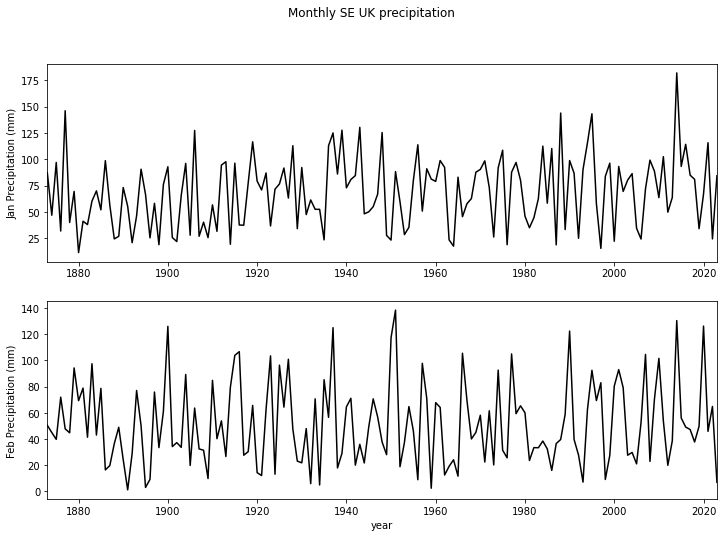

In [7]:
import matplotlib.pyplot as plt

name = f'Monthly SE UK precipitation'

# plot size 
x_size,y_size = 12,8

fig, axs = plt.subplots(2,1,figsize=(x_size,y_size))
axs = axs.flatten()

# set the figure title
fig.suptitle(name)

# plot y-data and set the label for the first panel
axs[0].plot(df["Year"],df['Jan'],'k',label='Jan')
axs[0].set_ylabel(f'Jan Precipitation (mm)')
axs[0].set_xlim(year0,year1)

# plot y-data and set the label for the next panel
axs[1].plot(df["Year"],df['Feb'],'k',label='Feb')
axs[1].set_ylabel(f'Feb Precipitation (mm)')
axs[1].set_xlim(year0,year1)

# x-label
_=axs[1].set_xlabel(f'year')

#### Exercise 1

We have seen how to access the dataset labels using:

    headings = df.columns[1:-1]
  
* Copy the code to read the HadSEEP monthly datasets above
* Write and run code that plots the precipitation data for all months separate subplots.

In [8]:
# ANSWER 
# Copy the code to read the HadSEEP monthly datasets above
import pandas as pd
from urlpath import URL
from pathlib import Path

# Monthly Southeast England precipitation (mm) 
site = 'https://www.metoffice.gov.uk/'
site_dir = 'hadobs/hadukp/data/monthly'
site_file = 'HadSEEP_monthly_totals.txt'

url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

panda_format = {
    'skiprows'   :  3,
    'na_values'  :  [-99.9],
    'sep'        :  r"[ ]{1,}",
    'engine'     :  'python'
}

df=pd.read_table(filename,**panda_format)

# df.head: first n lines
df.head()

file work/HadSEEP_monthly_totals.txt written: 15308 bytes


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1873,87.1,50.4,52.9,19.9,41.1,63.6,53.2,56.4,62.0,86.0,59.4,15.7,647.7
1,1874,46.8,44.9,15.8,48.4,24.1,49.9,28.3,43.6,79.4,96.1,63.9,52.3,593.5
2,1875,96.9,39.7,22.9,37.0,39.1,76.1,125.1,40.8,54.7,137.7,106.4,27.1,803.5
3,1876,31.8,71.9,79.5,63.6,16.5,37.2,22.3,66.3,118.2,34.1,89.0,162.9,793.3
4,1877,146.0,47.7,56.2,66.4,62.3,24.9,78.5,82.4,38.4,58.1,144.5,54.2,859.6


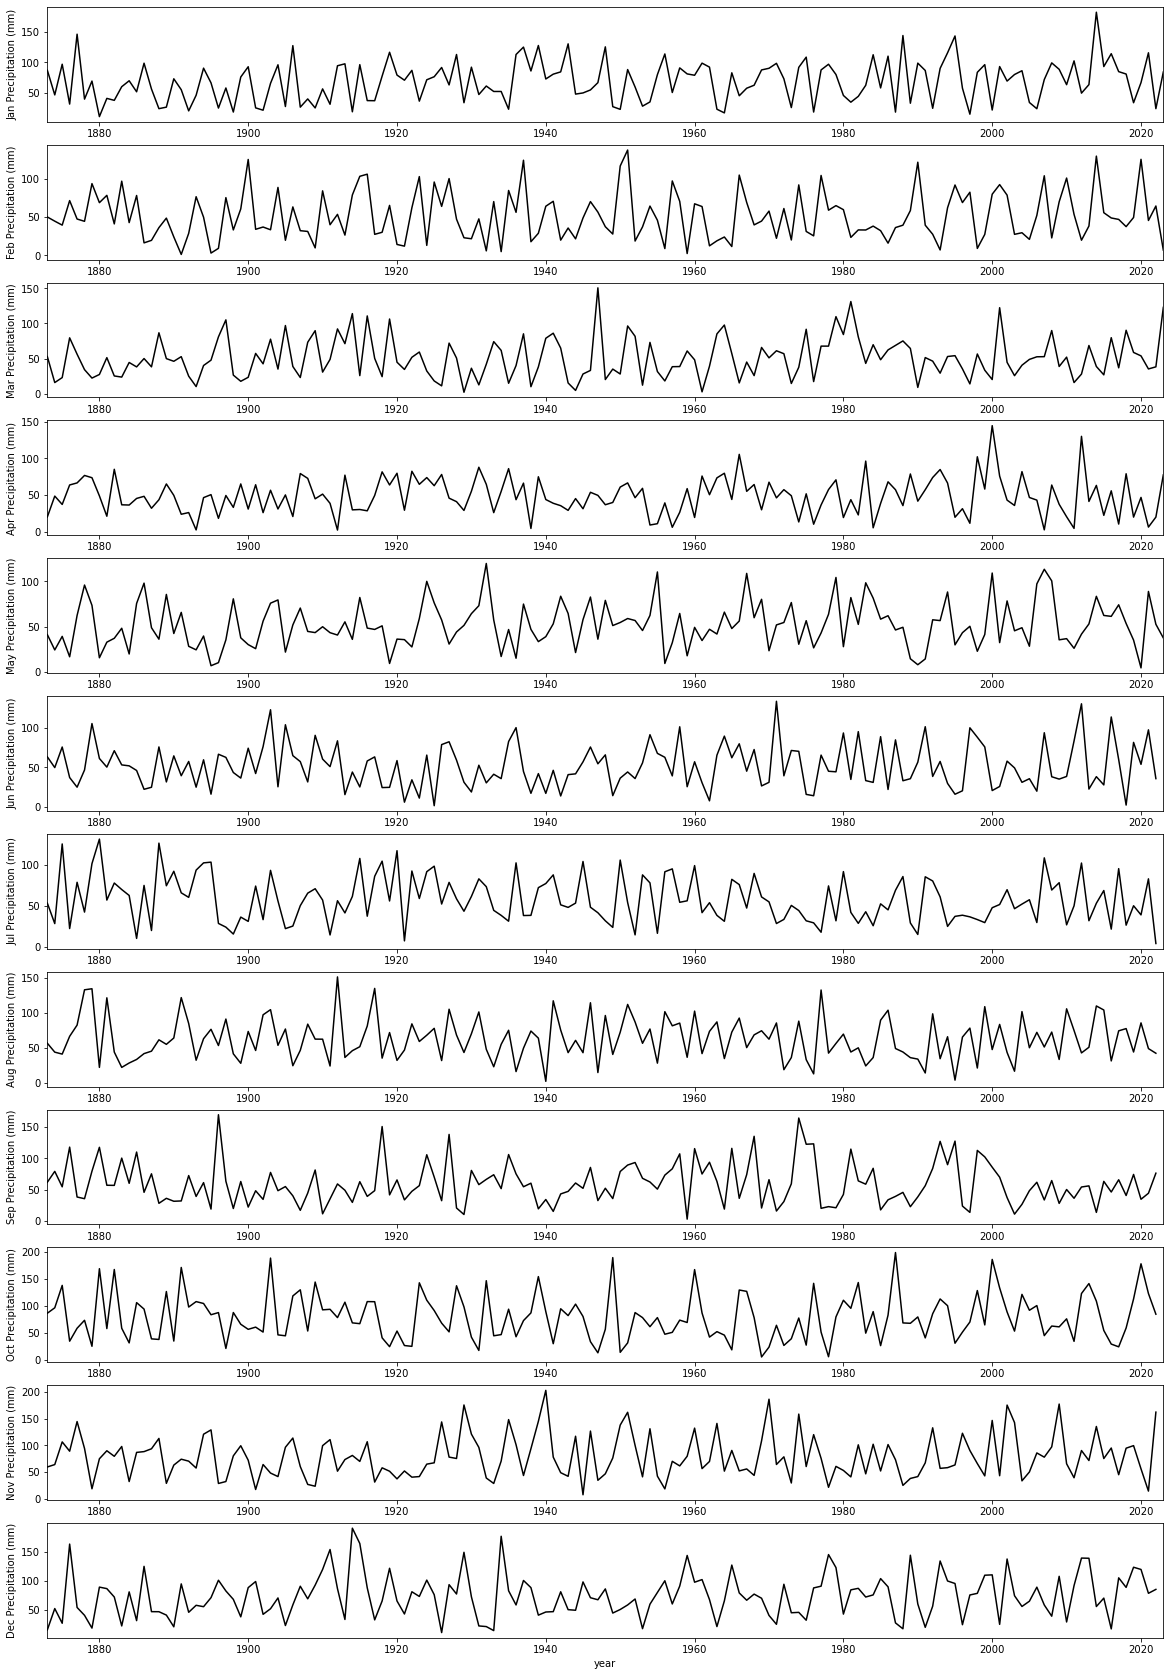

In [9]:
# ANSWER 2
# Write and run code that plots the 
# precipitation data for all months separate subplots.
import matplotlib.pyplot as plt

# plot size > in y
# need to play with this to get it right
x_size,y_size = 20,30

# get the m onth names from columns
months = df.columns[1:-1]

fig, axs = plt.subplots(12,1,figsize=(x_size,y_size))

# use enumerate in the loop, to get the index
for i,m in enumerate(months):
    # plot y-data and set the label for the first panel
    axs[i].plot(df["Year"],df[m],'k',label=m)
    axs[i].set_ylabel(f'{m} Precipitation (mm)')
    axs[i].set_xlim(year0,year1)

# x-label
_=axs[-1].set_xlabel(f'year')

## Errorbars, symbols, and `savefig`

We often need to include error bars in out plots. The simplest form of this involves setting a variable `yerr`, assumed equal positive and negative around `y`:

We can then use:
    
    plt.errorbar(x,y,yerr=yerr)

to plot the error bars. More [sophisticated options](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) are available for moore complex cases.

When we plot the errorbars, we might also like to plot a symbol at each data point. We can do this by giving an extra argument in `plot`. For example:

    plt.plot(x,y,'o')
    
will plot small circles at the data points. This can be customised by [symbol](https://matplotlib.org/3.1.0/api/markers_api.html) and/or [colour](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html). 

We also show here how to save the plot to an image file, using `plt.savefig`:

In [10]:
import pandas as pd
from urlpath import URL
from pathlib import Path

# Monthly Southeast England precipitation (mm) 
site = 'https://www.metoffice.gov.uk/'
site_dir = 'hadobs/hadukp/data/monthly'
site_file = 'HadSEEP_monthly_totals.txt'


url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')


panda_format = {
    'skiprows'   :  3,
    'na_values'  :  [-99.9],
    'sep'        :  r"[ ]{1,}",
    'engine'     :  'python'
}

df=pd.read_table(filename,**panda_format)
# get mean and std over all months

file work/HadSEEP_monthly_totals.txt written: 15308 bytes


We will go into the details of `numpy` in a future session, but here we just need to calculate the mean and standard deviation of precipitation over all months.

In [11]:
import numpy as np
months = df.columns[1:-1]
year   = df["Year"]
mean = np.nanmean(np.array(df[months]),axis=1)
std  = np.nanstd(np.array(df[months]),axis=1)

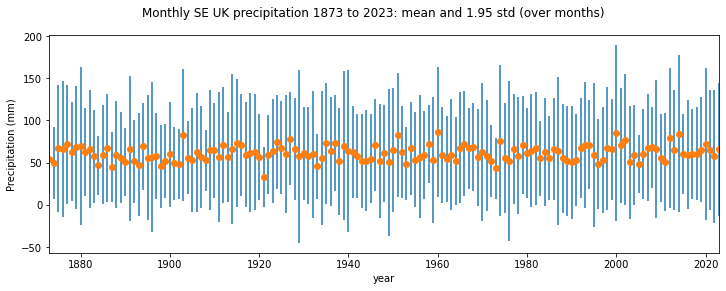

In [12]:
import matplotlib.pyplot as plt
# make a useful title
year0 = list(df["Year"])[0]
year1 = list(df["Year"])[-1]
name = f'Monthly SE UK precipitation {year0} to {year1}: mean and 1.95 std (over months)'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
fig.suptitle(name)

# plot y-data and error bars
x    = year
y    = mean
yerr = std * 1.96
# ls="none" so that no line is plotted
axs.errorbar(x,y,yerr=yerr,ls='none')
axs.plot(x,y,'o')


axs.set_ylabel(f'Precipitation (mm)')
# x-label
axs.set_xlabel(f'year')
axs.set_xlim(year0,year1)

# save to file
ofile = 'data/precip.png'
plt.savefig(ofile)

We can now load the [saved image](data/precip.png) as a figure with the markdown code:

    ![the figure we just saved](data/precip.png)

![the figure we just saved](data/precip.png)

Text(0.5, 0, 'year')

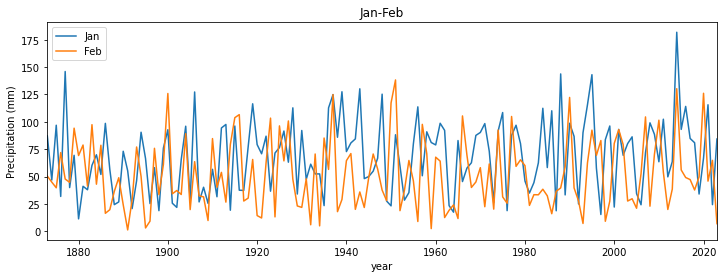

In [13]:
import matplotlib.pyplot as plt
# make a useful title
name = f'Monthly SE UK precipitation'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))

# plot y-data and set the label
axs.plot(df["Year"],df['Jan'],label='Jan')
axs.plot(df["Year"],df['Feb'],label='Feb')
axs.set_xlim(year0,year1)

# set legend now
axs.legend(loc='best')
# set the subplot title
axs.set_title('Jan-Feb')
# y-label
axs.set_ylabel(f'Precipitation (mm)')
# x-label
axs.set_xlabel(f'year')

## Date fields

Many datasets we deal with will be a function of time. Sometimes the date information may be presented in a format we can use as an integer (or even floating point number), an example being the year field above. But other times, we might need to work with the date format that comes with the dataset to make it something appropriate.

A useful Python package for this is [`datetime`](https://docs.python.org/3/library/datetime.html). 

Core elements of this is are: `datetime` class, the 

### `datetime`

In [14]:
from datetime import datetime
# now
now = datetime.now()
print(f'It is now {now}')
# access individual elements
print(f'day {now.day}')
print(f'month {now.month}')
print(f'year {now.year}')
print(f"{now.hour} O'clock")

It is now 2023-06-28 13:28:06.610810
day 28
month 6
year 2023
13 O'clock


You can set up the `datetime` fields explicitly:

In [15]:
from datetime import datetime

# datetime(year, month, day, hour, minute, second, microsecond)
then = datetime(1918, 11, 11, 11, 0, 0, 0)
print(f'It was then {then}')

# you can access this using keywords
then = datetime(year=1918, month=11, day=11, hour=11)
print(f'It was then {then}')

It was then 1918-11-11 11:00:00
It was then 1918-11-11 11:00:00


And do operations such as subtraction:

In [16]:
jan1_2019 = datetime(2019,1,1)
jan1_2020 = datetime(2020,1,1)

days_in_year = (jan1_2020-jan1_2019).days
print(f'year 2019 had {days_in_year} days')

year 2019 had 365 days


To add/subtract one day, or smaller unit, use timedelta:

In [17]:
from datetime import datetime
from datetime import timedelta

now = datetime.now()
yesterday = now - timedelta(days=1)
print(f'yesterday was {yesterday}')

yesterday was 2023-06-27 13:28:06.623570


### `strftime` and `strptime`

We use `strftime` to format a date string:

In [18]:
from datetime import datetime

# current date and time
now = datetime.now()

time_now = now.strftime("%H:%M:%S")
print(f"time now: {time_now}")

date_now = now.strftime("%m/%d/%Y")
# mm/dd/YY H:M:S format
print(f"data now: {date_now}")

time now: 13:28:06
data now: 06/28/2023


and `strptime` to load a `datetime` object from a string. To do so, we need to specify the format of the string. For example:

In [19]:
from datetime import datetime

date_then = "11 November, 1918"
# %d, %B and %Y -> day, month, year
date_object = datetime.strptime(date_then, "%d %B, %Y")
print(f"date: {date_object}")

date: 1918-11-11 00:00:00


or

In [20]:
from datetime import datetime

date_then = "2020-06-20"
date_object = datetime.strptime(date_then, "%Y-%m-%d")
print(f"date: {date_object}")

date: 2020-06-20 00:00:00


### NOAA precipitation

The file [2276931.csv](https://raw.githubusercontent.com/UCL-EO/geog0111/master/notebooks/data/2276931.csv) contains precipitation data for an [NOAA weather station](https://www.ncdc.noaa.gov/cdo-web/datasets#GSOY) `HAVANA 4.2 SW, FL US` for the year 2020 to date. Precipitation data are in inches.

We want to plot precipitation as a function of time. First, we read the data as previously:

In [21]:
import pandas as pd
from urlpath import URL
from pathlib import Path

site = 'https://raw.githubusercontent.com'
site_dir = '/UCL-EO/geog0111/master/notebooks/data'
site_file = '2276931.csv'

# form the URL
url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

# Read the file into pandas using url.open('r').
df=pd.read_csv(filename)

# print the first 5 lines of data
df.head(5)

file work/2276931.csv written: 15078 bytes


,STATION,NAME,DATE,PRCP,SNOW
0,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-01,0.00,0.0
1,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-02,0.00,0.0
2,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-03,0.00,0.0
3,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-04,0.98,NaN
4,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-05,0.00,0.0


We can refer to the datasets we see in the table above then as `df['DATE']`, `df['PRCP']` etc. 
If we want to use the station name, and access the first date from the dataframes, we can do this with:

    # take the first entry
    name = df['NAME'][0]
    date = df["DATE"][0]

#### Exercise 2
* Read the `2276931.csv` dataset into a pandas dataframe called `df`
* Convert the field `df["DATE"]` to a list called `dates`
* Use your understanding of `datetime` to convert the data `dates[0]` to a `datetime` object called `start_date`
* Convert the data `date[-1]` to a `datetime` object called `end_date`
* Find how many days between start_date and end_date
* Use a loop structure to convert the all elements in `dates` to be the n umber of days after the start date

In [22]:
# ANSWER
# Read the `2276931.csv` dataset into a 
# pandas dataframe called `df`
import pandas as pd
from urlpath import URL
from pathlib import Path

site = 'https://raw.githubusercontent.com'
site_dir = '/UCL-EO/geog0111/master/notebooks/data'
site_file = '2276931.csv'

# form the URL
url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

# Read the file into pandas using url.open('r').
df=pd.read_csv(filename)

# print the first 5 lines of data
df.head(5)

file work/2276931.csv written: 15078 bytes


,STATION,NAME,DATE,PRCP,SNOW
0,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-01,0.00,0.0
1,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-02,0.00,0.0
2,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-03,0.00,0.0
3,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-04,0.98,NaN
4,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-05,0.00,0.0


In [23]:
from datetime import datetime
# ANSWER
# Convert the field `df["DATE"]` to 
# a list called `dates`
dates = list(df["DATE"])

# Use your understanding of `datetime` to convert 
# the data `dates[0]` to a `datetime` object called `start_date`
# use datetime.strptime(d,"%Y-%m-%d") to read a date in the format 2020-09-02
start_date = datetime.strptime(dates[0], "%Y-%m-%d")
print(f'{dates[0]} -> {start_date}')

# Convert the data `date[-1]` to a 
# `datetime` object called `end_date`
end_date = datetime.strptime(dates[-1], "%Y-%m-%d")
print(f'{dates[-1]} -> {end_date}')

# find how many days between start_date and end_date
# ndays is number of days in date minus start date
ndays = (end_date - start_date).days
print(f'ndays: {start_date} to {end_date}: {ndays}')

# Use a loop structure to convert the all 
# elements in `dates` to be the number of days after the start date
ndays = [(datetime.strptime(d,"%Y-%m-%d")-start_date).days for d in dates]
print(ndays)

2020-01-01 -> 2020-01-01 00:00:00
2020-09-02 -> 2020-09-02 00:00:00
ndays: 2020-01-01 00:00:00 to 2020-09-02 00:00:00: 245
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

Let's do a simple plot of `df['PRCP']` as a function of days after 01/01/2020:

Text(0.5, 0, 'days after 01/01/2020')

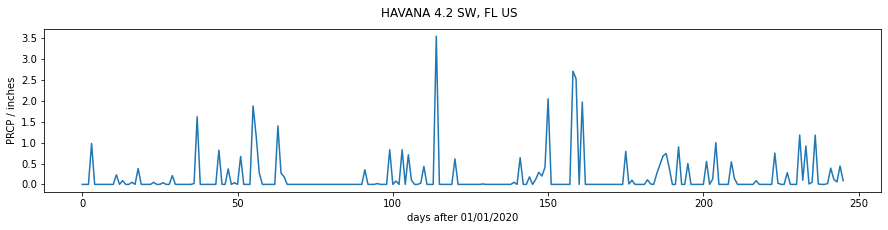

In [24]:
import matplotlib.pyplot as plt
from datetime import datetime

name = df['NAME'][0]
# use strptime to get date from %Y-%m-%d format
start_date = datetime.strptime(df["DATE"][0],"%Y-%m-%d")

# plot size 
x_size,y_size = 15,3
# set up the figure
fig, axs = plt.subplots(figsize=(x_size,y_size))

# set the title
fig.suptitle(name)

# plot x,y-data
# get number of days after start date
x = [(datetime.strptime(d,"%Y-%m-%d")-start_date).days for d in df["DATE"]]
y = df['PRCP']
axs.plot(x,y)

# label
axs.set_ylabel(f'PRCP / inches')
# format date string with strftime
axs.set_xlabel(f'days after {start_date.strftime("%d/%m/%Y")}')

We can use the date fields directly in the plot above, which might make the information easier to understand. But by default, all of the data fields will be printed:

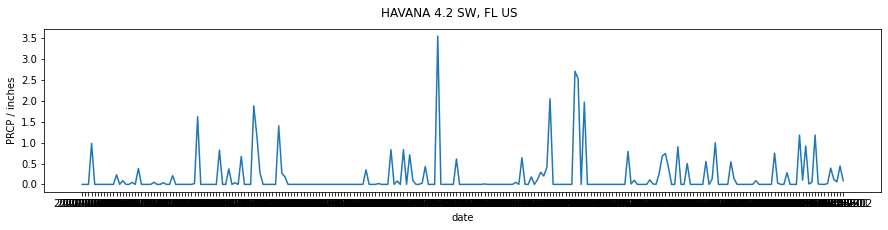

In [25]:
import matplotlib.pyplot as plt

name = df['NAME'][0]

# plot size 
x_size,y_size = 15,3
# set up the figure
fig, axs = plt.subplots(figsize=(x_size,y_size))

# set the title
fig.suptitle(name)

# plot y-data
axs.plot(df['DATE'],df['PRCP'])

# label
axs.set_ylabel(f'PRCP / inches')
_=axs.set_xlabel(f'date')

This is not a limitation of `matplotlib`, just a formatting issue. A quick [look into the matplotlib `dates` API](https://matplotlib.org/3.1.0/api/dates_api.html) shows us that we can quite simply set the x-ticks to be every month:

    months = mdates.MonthLocator() 
    axs.xaxis.set_major_locator(months)

Text(0.5, 0, 'date')

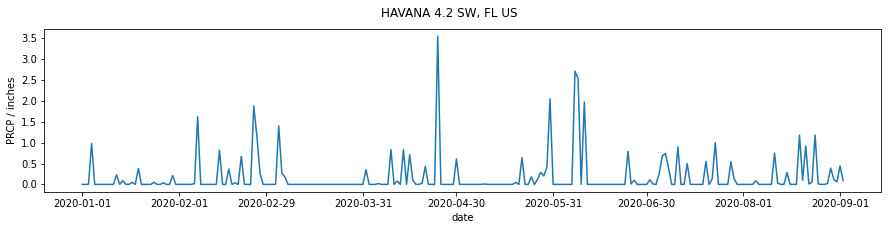

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

name = df['NAME'][0]

# plot size 
x_size,y_size = 15,3
# set up the figure
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))

# set the title
fig.suptitle(name)
axs.plot(df['DATE'],df['PRCP'])

# format the ticks: every month
months = mdates.MonthLocator() 
axs.xaxis.set_major_locator(months)

# label
axs.set_ylabel(f'PRCP / inches')
axs.set_xlabel(f'date')

Although the default formatting in [matplotlib](https://matplotlib.org/) will do an excellent job for the vast majority of your needs, you should be aware that you may meet cases where you need to look a little deeper into the documentation to find the right solution to your problem. You should always try to find such solutions in the existing codebase, rather than attempting to hack your way around a problem.

#### Exercise 3

We examined a pulsar time series in a [previous section of notes](022_Pandas.ipynb#pandas-transpose). It contains the [successive pulses](https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv) of the oscillation signal coming from the [Pulsar PSR B1919+21](https://www.joydivisionofficial.com/reimagined/) discovered by [Jocelyn Bell](https://en.wikipedia.org/wiki/Jocelyn_Bell_Burnell) in 1967.

The dataset as presented contains samples in columns, so that sample `0` is df[0], up to df[79] (80 samples).

* Plot the pulsar samples in a series of 80 sub-plots. 

**Advice**: 

For the figure, do not label the axes as it will get too cluttered. In any professional figure of that sort, you would need to explain the axes in accompanying text. 

For further 'effects' consider switching off the plotting of axes in each subplot, with:

    ax.axis('off')

for axis `ax` (this may be something like `axs[i]` in your code).

The results should be reminiscent of:

[![pulsar image](images/smallfig537.jpg)](https://blogs.scientificamerican.com/blogs/assets/sa-visual/Image/fig537.jpg)

and 

[![Joy Division](https://images-na.ssl-images-amazon.com/images/I/812FS2R2v6L._AC_SL1500_.jpg)](https://www.amazon.co.uk/Pleasures-VINYL-Joy-Division/dp/B00XILAIWI)

If you want to go further towards re-creating this, you consult [the matplotlib gallery](https://matplotlib.org/3.1.0/gallery/animation/unchained.html) for ideas.

In [27]:
# ANSWER 1

import pandas as pd
from urlpath import URL
from pathlib import Path

site = 'https://raw.githubusercontent.com'
site_dir = 'igorol/unknown_pleasures_plot/master'
site_file = 'pulsar.csv'

url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

# transposed version
df=pd.read_csv(filename,header=None).transpose()
df

file work/pulsar.csv written: 130465 bytes


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.81,-0.61,-1.43,-1.09,-1.13,-0.66,-0.36,-0.73,-0.89,-0.69,...,0.00,-0.16,0.19,-0.32,-0.16,0.62,0.32,-0.09,0.11,0.12
1,-0.91,-0.40,-1.15,-0.85,-0.98,-0.89,-0.21,-0.83,-0.61,-0.54,...,-0.12,-0.15,0.06,-0.83,-0.26,0.64,0.31,-0.14,0.05,-0.12
2,-1.09,-0.42,-1.25,-0.72,-0.93,-0.87,-0.44,-0.91,-0.74,-0.84,...,0.10,0.25,-0.27,-0.69,-0.36,0.59,0.28,-0.24,0.05,-0.12
3,-1.00,-0.38,-1.13,-0.74,-0.90,-0.87,-0.20,-1.10,-0.85,-0.89,...,-0.01,0.37,-0.11,-0.80,-0.49,0.30,0.42,-0.24,-0.05,-0.45
4,-0.59,-0.55,-0.76,-0.26,-1.14,-1.07,-0.31,-0.87,-0.77,-0.45,...,-0.15,-0.13,0.09,-0.76,0.00,0.01,-0.24,-0.66,-0.03,-0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.26,-0.83,0.11,-1.03,-0.29,-0.55,-1.45,-1.20,-0.94,-0.16,...,0.47,0.10,-0.06,0.08,0.28,-0.21,-0.56,-0.12,-0.87,0.13
296,-0.52,-0.80,-0.77,-0.78,-0.54,-0.62,-0.77,-1.40,-1.05,0.24,...,0.41,0.02,-0.08,-0.15,-0.01,-0.09,-0.50,0.29,-1.31,0.09
297,-0.44,-0.47,-0.88,-0.40,-0.65,-0.71,0.03,-0.51,-0.51,-0.17,...,0.32,-0.10,-0.04,0.03,-0.67,-0.24,-0.38,-0.02,-1.02,-0.01
298,-0.58,-0.13,-0.45,0.18,-0.64,-0.88,0.47,0.25,-0.47,-0.09,...,0.57,-0.16,0.23,0.03,-0.86,-0.17,-0.58,0.21,-1.10,-0.03


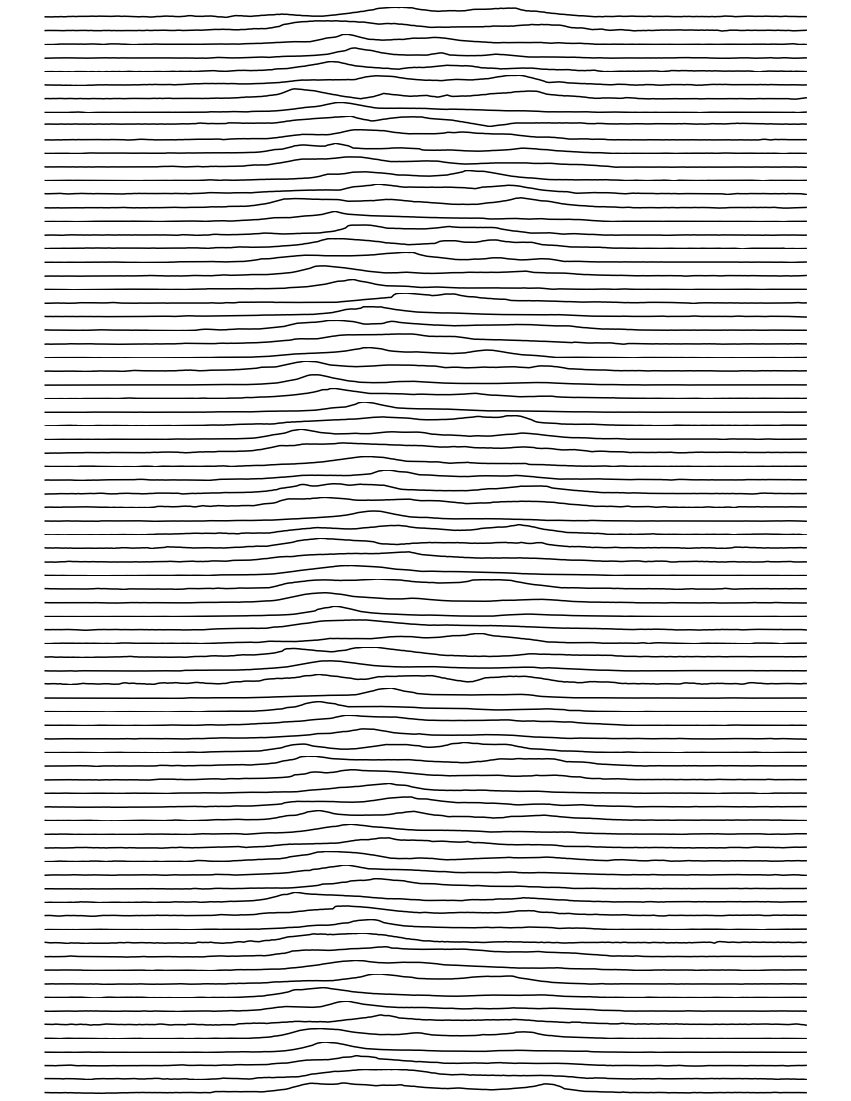

In [28]:
# ANSWER 2
# Plot the pulsar samples in a series of 80 sub-plots.
import matplotlib.pyplot as plt

# need to play with this to get it right
x_size,y_size = 15,20

# get the m onth names from columns
samples = df.columns
fig,axs = plt.subplots(len(df.columns),1,figsize=(x_size,y_size))

# use enumerate in the loop, to get the index
for i,m in enumerate(samples):
    axs[i].plot(df[m],'k')
    axs[i].axis('off')

## Summary

In this section, we have learned how to plot graphs from datasets we have read in or downloaded from the web. We have concentrated in simple line graphs, with possibly multiple sub-plots here, although there are many other types of graph you may consider. 

The [`matplotlib` gallery](https://matplotlib.org/3.3.1/gallery/index.html) provides a useful starting point for other types of plot. You might also consider the Python packages [`bokeh`](https://bokeh.org/) and [`seaborn`](https://seaborn.pydata.org/) for improved visualisation and interaction.

Remember:



            import matplotlib.pyplot as plt
            import matplotlib.dates as mdates


| Function | Comment | Keywords |
|---|---|---|
|`fig, axs = plt.subplots(xshape,yshape)` | set up new figure as array of sub-plots `xshape` by `yshape` and return `fig` object for figure and `axs` object for subplots. `axs` is array of objects shape `(xshape,yshape)`, or single object if `(1,1)`. We often use `axs = axs.flatten()` to flatten the `axs` array to 1D.|`figsize=(sx,sy)` : set figure size `sx` by `sy`|
| `plt.savefig("ofile.png")` | Save plot to file `"ofile.png"` | 
| `fig.suptitle(name)` | set title `name` at top of figure `fig`
| `im = axs.plot(xdata,ydata,cs)` | plot line graph with `ydata` as a function of `xdata` and return plot object `im`. If argument `cs` is given, this is a colour/symbol e.g. `k+` for black crosses. | `label=str` : set `str` as label for this line. For use with `legend`| 
| `im = plt.errorbar(xdata,ydata)` | Error bar plot for `ydata` as a function of `xdata`. Needs kwarg | `yerr=yerr` : set y-error bar to values in array `yerr` |
| `axs.set_xlim(x0,x1)` | Set plot x-extent to from `x0` to `x1` |
| `axs.set_ylim(y0,y1)` | Set plot x-extent to from `y0` to `y1` |
| `axs.set_title(name)` | set sub-plot `axs` title to `name` |
| `axs.set_xlabel(xlab)` | set x-axis label to `xlab` |
| `axs.set_ylabel(ylab)` | set y-axis label to `ylab` |1
| `axs.legend()` | set legend in plot | `loc='best'` : best location, otherwise `top left` etc. |
| `mdates.MonthLocator()` | `MonthLocator` object of month locators, e.g. `months = mdates.MonthLocator()` |
| `axs.xaxis.set_major_locator(months)` | set major ticks on x-axis to `Locator` object of `months`|


Some colours and symbols:

| symbol/colour | name |
|---|---|
|'k+' | black plus |
|'r.' | red dot  |
|'go' | green circle  |
|'b-' | blue line  |
|'c--' | cyan dashed line  |
|'y-o' | yellow  line with circles  |


`datetime`

            from datetime import datetime
            
            
| function | comment |
|---|---|
|`datetime.now()` | date and time for now |
|`datetime(year, month, day, hour, minute, second, millisecond)` | return `datatime` object for time/date specified. Not all fields need be given. Can also use keywords but `year`, `month` and `day` must be given e.g.: `datetime(2020,day=1,month=2,hour=12)`|
| `datetime.day` | day etc. |
| `timedelta` | subtract two `datetime`s to get a `timedelta`|
|`timedelta.days` | number of days in `timedelta` |
| `dt.strftime("%H:%M:%S")` | represent `datetime` object `dt` as `hour:minute:second`|
| `dt.strftime("%m/%d/%Y")` | represent `datetime` object `dt` as `month/day/year`|
| `datetime.strptime(str,format)` | load string `str` into `datetime` object interpreting as format `format`, e.g. `datetime.strptime("11 November, 1918", "%d %B, %Y")` -> `1918-11-11 00:00:00`; e.g. `datetime.strptime("2020-06-20", "%Y-%m-%d")` -> `2020-06-20 00:00:00`|


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](024_Image_display.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](022_Pandas.ipynb)
